In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Perfectly separated classes

In [2]:
# # Data preparation
# np.random.seed(67)
# X, y = make_blobs(n_samples=200, centers=2, cluster_std=1.0, random_state=32, center_box=(-5, 5))

# # Split the data into train, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Overlapping classes

In [3]:
np.random.seed(67)
# from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=32)

# # Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Plain Logistic

In [4]:
# Visualization of the decision boundary
def plot_decision_boundary(X, y, weights):
    # Create grid to plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Calculate decision boundary
    Z = sigmoid(np.c_[xx.ravel(), yy.ravel()] @ weights)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, cmap='RdYlBu')

    # Scatter plot of training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='RdYlBu')
    plt.title("Decision Boundary and Data Points")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Visualization of the decision boundary
def plot_mlp_decision_boundary_scikit(X, y, model):
    # Create grid to plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Calculate decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')

    # Scatter plot of training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='RdYlBu')
    plt.title("Decision Boundary of MLPClassifier and Data Points")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

## GD

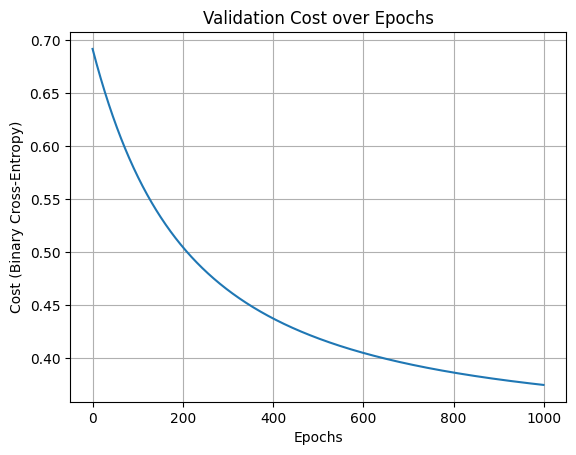

Confusion Matrix before Training on Validation:
[[0 7]
 [0 9]]
Initial validation accuracy before training: 0.5625

Confusion Matrix after Training on Validation Set:
[[6 1]
 [0 9]]
Final Validation Accuracy: 0.9375


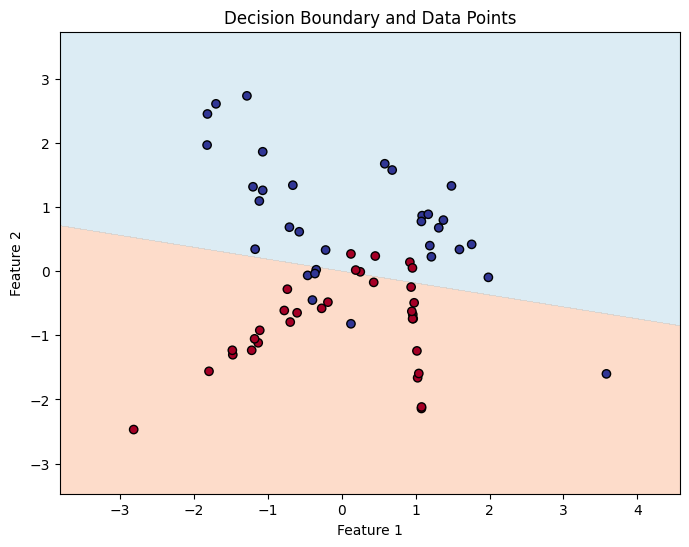

In [5]:
# Sigmoid function and cost function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    predictions = sigmoid(X @ weights)
    cost = -np.mean(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))
    return cost
    
def binary_cross_entropy(predictions, targets):
    predictions = np.clip(predictions, 1e-9, 1 - 1e-9)  # Avoid log(0)
    return -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))

# Logistic Regression with Gradient Descent
def logistic_regression_gd(X, y, learning_rate=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    cost_history = []

    for epoch in range(epochs):
        predictions = sigmoid(X @ weights)
        gradient = (1 / n_samples) * (X.T @ (predictions - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

# Logistic Regression training
learning_rate = 0.01
epochs = 1000
weights, cost_history = logistic_regression_gd(X_train, y_train, learning_rate, epochs)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

# Plotting the decision boundary
plot_decision_boundary(X_train, y_train, weights)

## SGD true

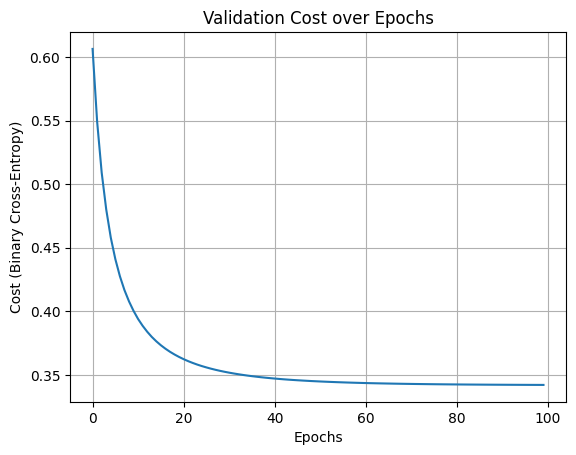

Confusion Matrix before Training on Validation:
[[0 7]
 [0 9]]
Initial Validation accuracy before training: 0.5625

Confusion Matrix after Training on Validation Set:
[[6 1]
 [0 9]]
Final Validation Accuracy: 0.9375


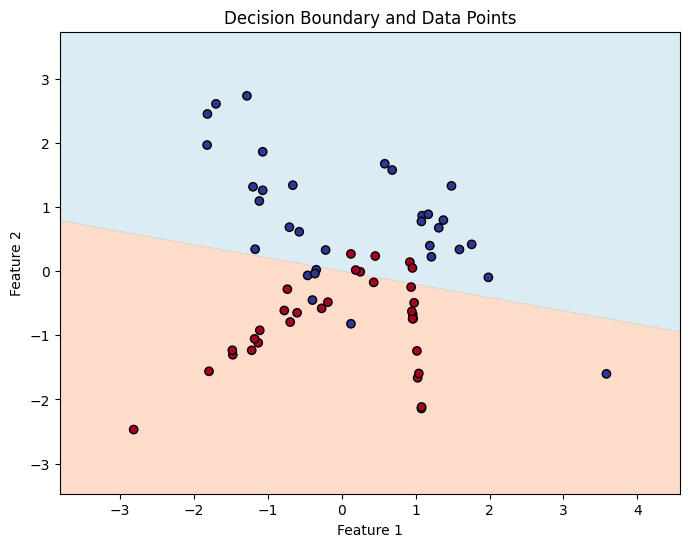

In [6]:
def logistic_regression_sgd(X, y, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(n_samples):
            # Single data point
            X_i = X_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]

            z = X_i @ weights
            predictions = sigmoid(z)

            # Compute gradient for the single sample
            gradient = X_i.T * (predictions - y_i)

            # Update weights
            weights -= learning_rate * gradient.flatten()  # flatten to make it 1D

        # Record cost after each epoch
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history

learning_rate = 0.01
epochs = 100
weights, cost_history = logistic_regression_sgd(X_train, y_train, learning_rate, epochs)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial Validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

plot_decision_boundary(X_train, y_train, weights)

## SGD minibatch

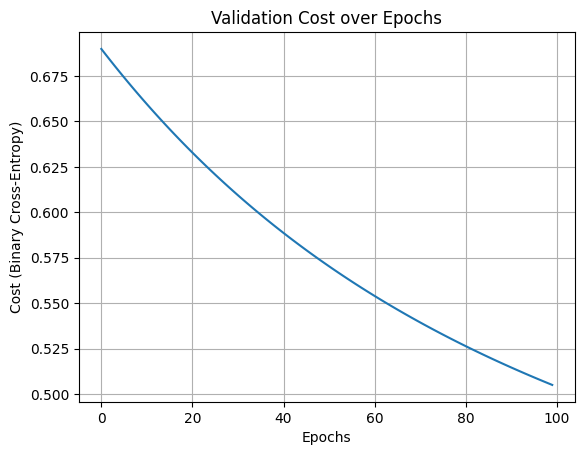

Confusion Matrix before Training on Validation:
[[0 7]
 [0 9]]
Initial Validation accuracy before training: 0.5625

Confusion Matrix after Training on Validation Set:
[[6 1]
 [0 9]]
Final Validation Accuracy: 0.9375


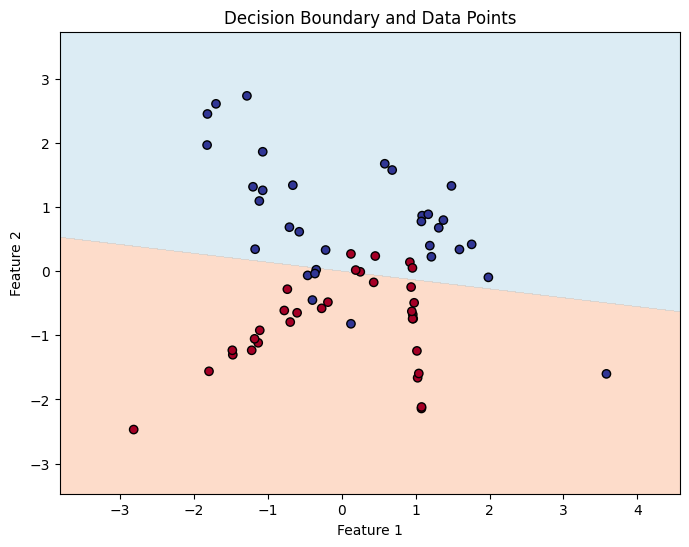

In [7]:
def logistic_regression_mgd(X, y, learning_rate=0.01, epochs=100, batch_size=32):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start_idx in range(0, n_samples, batch_size):
            X_batch = X_shuffled[start_idx:start_idx + batch_size]
            y_batch = y_shuffled[start_idx:start_idx + batch_size]

            z = X_batch @ weights
            predictions = sigmoid(z)

            # Compute gradient
            gradient = (1 / batch_size) * (X_batch.T @ (predictions - y_batch))

            # Update weights
            weights -= learning_rate * gradient

        # Record cost
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

    return weights, cost_history
    
weights, cost_history = logistic_regression_mgd(X_train, y_train, learning_rate, epochs)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial Validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

plot_decision_boundary(X_train, y_train, weights)

## Scikit-Learn

Accuracy with scikit-learn Logistic Regression: 0.9375

Final Confusion Matrix on validation set:
[[6 1]
 [0 9]]


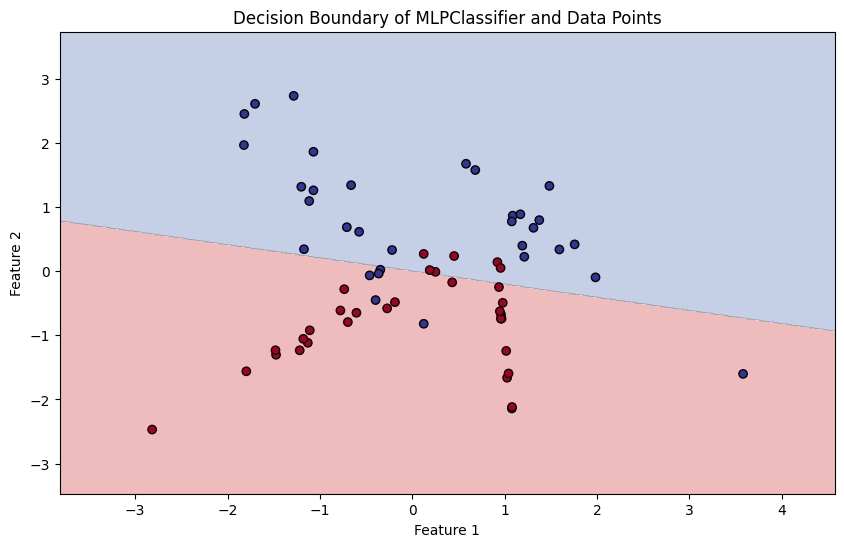

In [8]:
sklearn_log_reg = LogisticRegression(penalty=None, solver='sag', max_iter=10000)
sklearn_log_reg.fit(X_train, y_train)

# Predictions and evaluation
final_predictions_val = sklearn_log_reg.predict(X_val)
accuracy_sklearn = accuracy_score(y_val, final_predictions_val)

print("Accuracy with scikit-learn Logistic Regression:", accuracy_sklearn)

# Confusion matrix
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
print("\nFinal Confusion Matrix on validation set:")
print(final_conf_matrix_val)

# Plotting the decision boundary for MLPClassifier
plot_mlp_decision_boundary_scikit(X_train, y_train, sklearn_log_reg)

# RIDGE

In [9]:
def compute_cost_Ridge(X, y, weights, l2_lambda=0.0):
    # Calculate predictions
    z = X @ weights
    predictions = sigmoid(z)
    # Cost with L2 regularization
    cost = binary_cross_entropy(predictions, y) + (l2_lambda / 2) * np.sum(weights[1:] ** 2)
    return cost

## GD

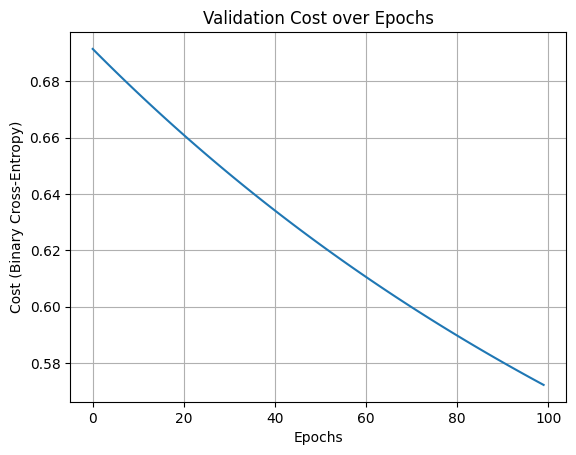

Confusion Matrix before Training on Validation:
[[0 7]
 [0 9]]
Initial Validation accuracy before training: 0.5625

Confusion Matrix after Training on Validation Set:
[[6 1]
 [0 9]]
Final Validation Accuracy: 0.9375


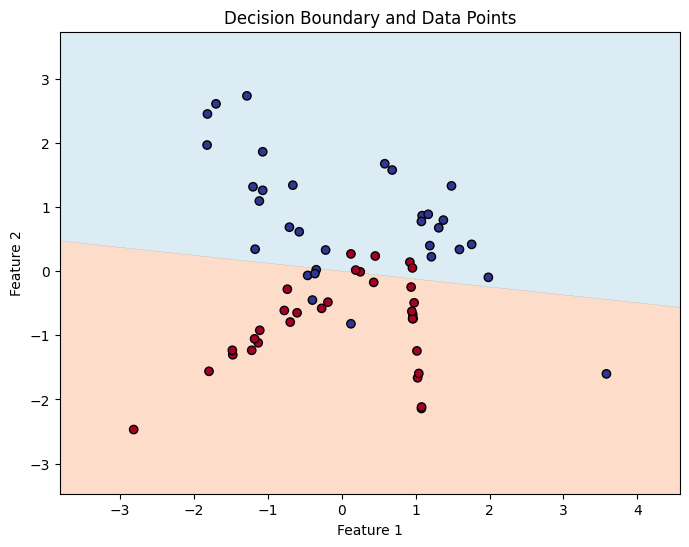

In [10]:
def logistic_gd_Ridge(X, y, learning_rate=0.01, epochs=1000, l2_lambda=0.01):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    for epoch in range(epochs):
        # Compute predictions
        z = X @ weights
        predictions = sigmoid(z)

        # Gradient of cost function with L2 regularization
        gradient = (1 / n_samples) * (X.T @ (predictions - y)) + l2_lambda * np.r_[0, weights[1:]]

        # Update weights
        weights -= learning_rate * gradient

        # Record cost for monitoring
        cost = compute_cost_Ridge(X, y, weights, l2_lambda)
        cost_history.append(cost)

    return weights, cost_history

lmbda=0.001
weights, cost_history = logistic_gd_Ridge(X_train, y_train, learning_rate, epochs, lmbda)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial Validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

plot_decision_boundary(X_train, y_train, weights)

## SGD

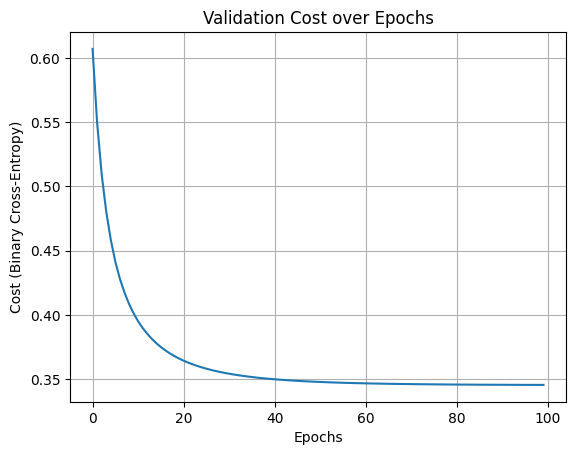

Confusion Matrix before Training on Validation:
[[0 7]
 [0 9]]
Initial Validation accuracy before training: 0.5625

Confusion Matrix after Training on Validation Set:
[[6 1]
 [0 9]]
Final Validation Accuracy: 0.9375


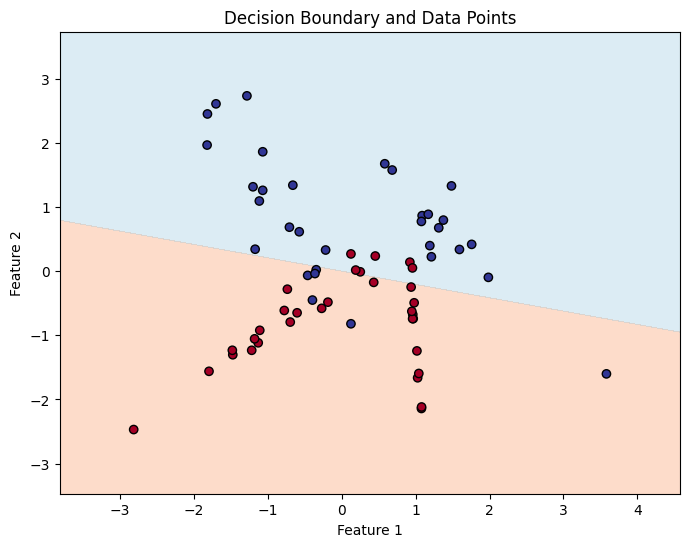

In [11]:
def logistic_sgd_Ridge(X, y, learning_rate=0.01, epochs=100, l2_lambda=0.01):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(n_samples):
            # Single data point
            X_i = X_shuffled[i:i+1]
            y_i = y_shuffled[i:i+1]

            z = X_i @ weights
            predictions = sigmoid(z)

            # Compute gradient for the single sample
            gradient = (X_i.T @ (predictions - y_i)) + l2_lambda * np.r_[0, weights[1:]]

            # Update weights
            weights -= learning_rate * gradient.flatten()  # flatten to make it 1D

        # Record cost after each epoch
        cost = compute_cost_Ridge(X, y, weights, l2_lambda)
        cost_history.append(cost)

    return weights, cost_history

learning_rate = 0.01
epochs = 100
lmbda=0.001
weights, cost_history = logistic_sgd_Ridge(X_train, y_train, learning_rate, epochs,lmbda)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial Validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

plot_decision_boundary(X_train, y_train, weights)

## MGD

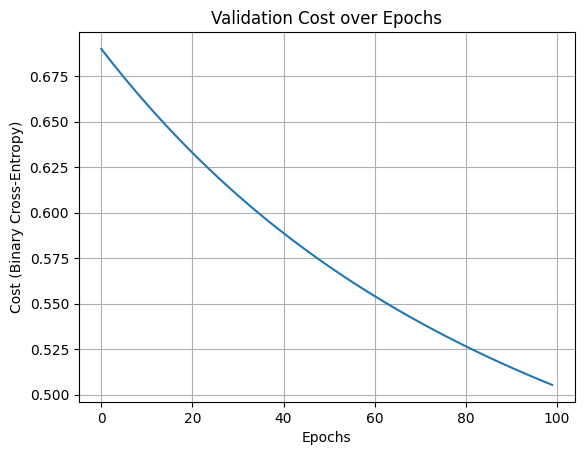

Confusion Matrix before Training on Validation:
[[0 7]
 [0 9]]
Initial Validation accuracy before training: 0.5625

Confusion Matrix after Training on Validation Set:
[[6 1]
 [0 9]]
Final Validation Accuracy: 0.9375


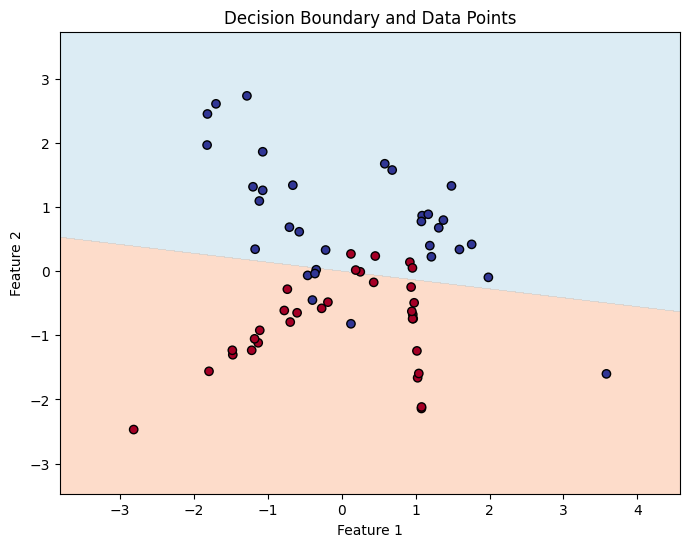

In [12]:
def logistic_mgd_Ridge(X, y, learning_rate=0.01, epochs=100, batch_size=32, l2_lambda=0.0):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)

    cost_history = []
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for start_idx in range(0, n_samples, batch_size):
            X_batch = X_shuffled[start_idx:start_idx + batch_size]
            y_batch = y_shuffled[start_idx:start_idx + batch_size]

            z = X_batch @ weights
            predictions = sigmoid(z)

            # Compute gradient with L2 regularization
            gradient = (1 / batch_size) * (X_batch.T @ (predictions - y_batch)) + l2_lambda * np.r_[0, weights[1:]]

            # Update weights
            weights -= learning_rate * gradient

        # Record cost
        cost = compute_cost_Ridge(X, y, weights, l2_lambda)
        cost_history.append(cost)

    return weights, cost_history

batch_size=32
lmbda=0.001
weights, cost_history = logistic_mgd_Ridge(X_train, y_train, learning_rate, epochs, batch_size, lmbda)

# Plot cost history
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost (Binary Cross-Entropy)")
plt.title("Validation Cost over Epochs")
plt.grid()
plt.show()

# Confusion matrix before training (untrained weights)
initial_predictions = sigmoid(X_val @ np.zeros(X_val.shape[1])) >= 0.5
initial_conf_matrix = confusion_matrix(y_val, initial_predictions)
initial_accuracy = accuracy_score(y_val, initial_predictions)
print("Confusion Matrix before Training on Validation:")
print(initial_conf_matrix)
print(f"Initial Validation accuracy before training: {initial_accuracy:.4f}")

# Confusion matrix after training
final_predictions_val = sigmoid(X_val @ weights) >= 0.5
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
final_accuracy_val = accuracy_score(y_val, final_predictions_val)
print("\nConfusion Matrix after Training on Validation Set:")
print(final_conf_matrix_val)
print(f"Final Validation Accuracy: {final_accuracy_val:.4f}")

plot_decision_boundary(X_train, y_train, weights)

## Scikit-Learn

Accuracy with scikit-learn Logistic Regression: 0.9375

Final Confusion Matrix on validation set:
[[6 1]
 [0 9]]


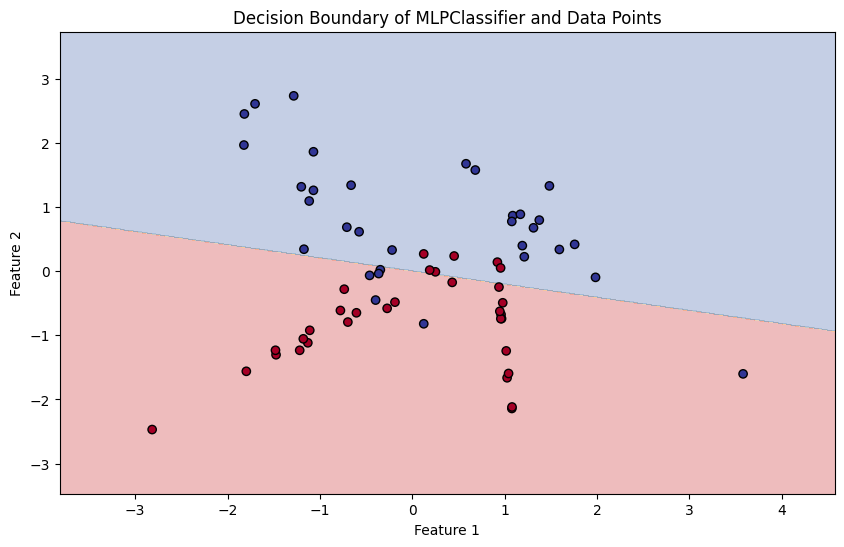

In [13]:
# Use L2 regularization (ridge) with C = 1/lambda
l2_lambda = 0.01
sklearn_log_reg = LogisticRegression(penalty=None, solver='sag', max_iter=1000)
sklearn_log_reg.fit(X_train, y_train)

# Predictions and evaluation
final_predictions_val = sklearn_log_reg.predict(X_val)
accuracy_sklearn = accuracy_score(y_val, final_predictions_val)

print("Accuracy with scikit-learn Logistic Regression:", accuracy_sklearn)

# Confusion matrix
final_conf_matrix_val = confusion_matrix(y_val, final_predictions_val)
print("\nFinal Confusion Matrix on validation set:")
print(final_conf_matrix_val)

# Plotting the decision boundary for MLPClassifier
plot_mlp_decision_boundary_scikit(X_train, y_train, sklearn_log_reg)